# Sentiment Analysis on Tweets

## Contents:
* [Introduction](#introduction)
* [Importing Libraries and loading the Data](#import_libraries)
* [Exploratory Data Analysis](#data_prep)
    - [Initial Rows](#inital_rows)
    - [Total Number of Tweets](#total_tweets)
    - [Language of Tweets](#tweets_lang)
    - [User with Most Followers](#most_popular_user)
    - [Tweet with most Retweets](#most_retweets)
    - [Location of tweets](#location_tweets)
    - [Popularity of User](#users_popularity)
    - [Summary of Initial Insights](#initial_insights)
* [Sentiment Analysis](#sentiment_analysis)
    - [Data Cleaning](#data_cleaning)
    - [Calculating Sentiments of the tweets](#calculating_sentiments)
    - [Overall Sentiments](#overall_sentiments)
    - [Sentiments of Tweets from People with More than 10,000 Followers](#high_popular_sentiments)
    - [Sentiments of Tweets from People with Followers Between 1000 and 10,000](#medium_popular_sentiments)
    - [Sentiments of Tweets from People with Less than 1000 followers](#low_popular_sentiments)
    - [Sentiments of Tweets from User with Most Followers](#most_popular_user_sentiments)
    - [Sentiments of Tweet with Most Retweets](#most_retweets_tweet_sentiments)
    - [Sentiments of Favourite Tweet](#favourite_tweet_sentiments)
* [Conclusion](#conclusion)
* [Future Work](#future_work)

## Introduction <a class="anchor" id="introduction"></a>

The purpose of this notebook is to do sentiment analysis of 100,000 tweets and hence figure out the emotions behind those tweets

Sentiment analysis is mainly done using 2 approaches
- Lexicon Based Approach
- Machine Learning Based Approach

In this notebook, the main focus will be on a Lexicon based approach since it is easier to implement and get an initial idea of the sentiments behind the tweets

The following steps give an idea how the lexicon based approach classifies sentences:
- The first step is tokenization which means dividing the sentence into its words
- Then it is checked how many times each word shows up
- The sentiment of each word is then looked up in Lexicon which is a database containing sentimental values of words recorded by researchers
- Once these values are found, the overall sentiment of the sentence is then found using these values

## Importing Libraries and loading Data <a class="anchor" id="import_libraries"></a>

In [195]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [196]:
raw_data = pd.read_csv("100ktweets.csv", delimiter=",")

## Exploratory Data Analysis<a class="anchor" id="data_prep"></a>

#### Initial rows<a class="anchor" id="inital_rows"></a>

In [197]:
raw_data.head()

,ID,Username,Name,Datetime,Tweet_Id,Text,Tweet_Retweet_count,Tweet_Favorite_count,Tweet_language,Source,Location,Company_url,User_followers_count,User_friends_count
0,1,kaarmann,Kristo Käärmann,2020-11-18 09:49:25,1328998738296246273,RT @TransferWise: In case you don’t speak Bank...,9,0,en,Twitter for Android,London,http://t.co/JgKyPiCFQe,23899,276
1,2,kaarmann,Kristo Käärmann,2020-11-18 08:22:15,1328976801171972096,RT @AlbertEinstein: The secret math society kn...,53,0,en,Twitter for Android,London,http://t.co/JgKyPiCFQe,23899,276
2,3,kaarmann,Kristo Käärmann,2020-11-17 09:28:15,1328631023589003264,@stp_ip No. Actually the table is wrong for €1...,0,1,en,Twitter Web App,London,http://t.co/JgKyPiCFQe,23899,276
3,4,kaarmann,Kristo Käärmann,2020-11-17 09:27:02,1328630716511514624,"@stp_ip I see, looks like my source was 10x wr...",0,0,en,Twitter Web App,London,http://t.co/JgKyPiCFQe,23899,276
4,5,kaarmann,Kristo Käärmann,2020-11-17 09:25:49,1328630411350716418,@stp_ip Fun fact: €1bn in €100 bills is ~11 to...,0,1,en,Twitter Web App,London,http://t.co/JgKyPiCFQe,23899,276


#### Total Number of Tweets<a class="anchor" id="total_tweets"></a>

In [198]:
raw_data.shape

(100000, 14)

#### Total number of Users<a class="anchor" id="total_users"></a>

In [199]:
raw_data["Username"].nunique()

361

#### Lanuage of Tweets<a class="anchor" id="tweet_lang"></a>

In [200]:
raw_data["Tweet_language"].unique()

array(['en'], dtype=object)

#### User with Most Followers<a class="anchor" id="most_popular_user"></a>

In [201]:
raw_data["Name"][raw_data["User_followers_count"].idxmax()]

'Sir Clive Woodward'

#### Tweet with most retweets<a class="anchor" id="most_retweet"></a>

In [202]:
print(raw_data["Name"][raw_data["Tweet_Retweet_count"].idxmax()])
print(raw_data["Text"][raw_data["Tweet_Retweet_count"].idxmax()])

Greg Law
RT @gnuman1979: Quarantine day 6. https://t.co/er652Oy3Ki


#### Location of Tweets<a class="anchor" id="location_tweets"></a>

In [203]:
raw_data['Location'].value_counts()

London                       28631
London, England              15019
London, UK                    7845
Robotic Web Automation ??     3011
London, obviously.            2957
                             ...  
Everywhere : )                   1
Liverpool                        1
London, Sofia / Bulgaria         1
High Easter                      1
ישראל                            1
Name: Location, Length: 110, dtype: int64

#### Popularity of Users<a class="anchor" id="users_popularity"></a>

In [204]:
def plot_bar_chart(x_data, y_data, x_label, y_label, title):
    plt.bar(x_data, y_data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle='--')

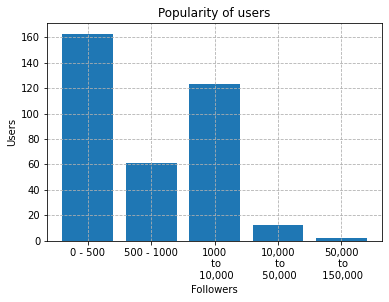

In [205]:
user_followers_count = raw_data_unique_usernames["User_followers_count"]
followers, _, _ = plt.hist(user_followers_count, bins=[0, 500, 1000, 10000, 50000, 150000], histtype='bar', ec='black')
plt.close()
x_labels = ["0 - 500", "500 - 1000", "1000\n to\n 10,000", "10,000\n to\n 50,000", "50,000\n to\n 150,000"]
plot_bar_chart(x_labels, followers, "Followers", "Users", "Popularity of users")

### Summary of Initial Insights<a class="anchor" id="initial_insights"></a>
* Total tweets: 100,000
* Total users from whom we have the tweets: 361
* Total parameters describing each of the tweets: 13
* All tweets are in the language English
* The location from where we have the most tweets is London
* The User with the most followers is Sir Clive Woodward
* The tweet with the most retweets by Greg Law
* Most the users have less than 1000 followers, however, there are a significant number of users with followers between 1000 and 10,000. This can be visualized in the graph below

## Sentiment Analysis<a class="anchor" id="sentiment_analysis"></a>

We will first do sentiment analysis using the library TextBlob. In order to do this, we will use the following aproach:
* Clean the text by removing parts of the text which do not provide us any information regarding its sentiment
* Add a polarity column which tells us about the positivity of the statement
* Add a subjectivity column which tells us whether the text contains factual information or if it contains more opinions
* Analyse the sentiments of tweets of people grouped by the popularity of people

### Data Cleaning<a class="anchor" id="data_cleaning"></a>

In [206]:
def clean_tweet_text(text):
    start_index = 0
    try:
        if text.startswith('RT'):
            start_index = text.index(':') + 2
        if text.startswith('@'):
            start_index = text.index(' ') + 1
    except:
        pass
    final_text = text[start_index:]
    return final_text

In [207]:
raw_data['clean_tweet_text'] = raw_data['Text'].apply(clean_tweet_text)

### Calculating Sentiments of the tweets<a class="anchor" id="calculating_sentiments"></a>

In [208]:
def calc_polarity(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
def calc_subjectivity(text):
    subjectivity = TextBlob(text).sentiment.subjectivity
    if subjectivity > 0.5:
        return 'Objective'
    elif polarity < 0.5:
        return 'Subjective'
    else:
        return 'Neutral'

In [209]:
raw_data["tweet_polarity"] = raw_data['clean_tweet_text'] .apply(calc_polarity)
raw_data["tweet_subjectivity"] = raw_data['clean_tweet_text'] .apply(calc_subjectivity)

In [210]:
raw_data["tweet_polarity"].value_counts()

Positive    56091
Neutral     30406
Negative    13503
Name: tweet_polarity, dtype: int64

In [211]:
raw_data["tweet_subjectivity"].value_counts()

Subjective    63360
Objective     36640
Name: tweet_subjectivity, dtype: int64

In [212]:
def plot_bar_chart(x_data, y_data, x_label, y_label, title):
    plt.bar(x_data, y_data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle='--')

### Overall Sentiments<a class="anchor" id="overall_sentiments"></a>

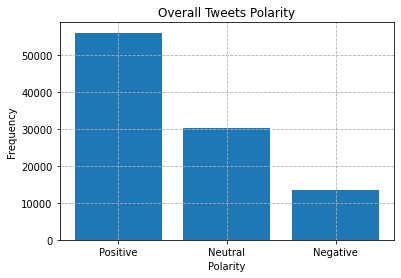

In [227]:
tweet_polarity_values = raw_data["tweet_polarity"].value_counts().index
tweet_polarity_freq = raw_data["tweet_polarity"].value_counts().values
plot_bar_chart(tweet_polarity_values, tweet_polarity_freq, 'Polarity', 'Frequency', 'Overall Tweets Polarity')

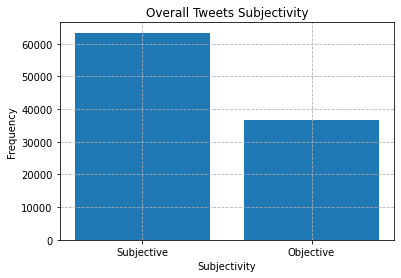

In [228]:
tweet_subjectivity_values = raw_data["tweet_subjectivity"].value_counts().index
tweet_subjectivity_freq = raw_data["tweet_subjectivity"].value_counts().values
plot_bar_chart(tweet_subjectivity_values, tweet_subjectivity_freq, 'Subjectivity', 'Frequency', 'Overall Tweets Subjectivity')

### Sentiments of Tweets from people with more than 10,000 follower<a class="anchor" id="high_popular_sentiments"></a>

In [229]:
data_high_popularity = raw_data[raw_data["User_followers_count"] >= 10000]

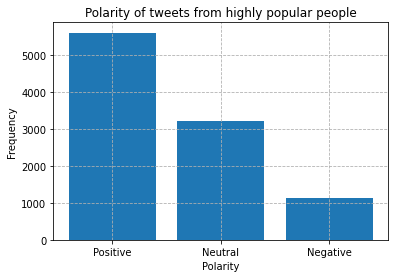

In [230]:
tweet_polarity_values = data_high_popularity["tweet_polarity"].value_counts().index
tweet_polarity_freq = data_high_popularity["tweet_polarity"].value_counts().values
plot_bar_chart(tweet_polarity_values, tweet_polarity_freq, 'Polarity', 'Frequency', 'Polarity of tweets from highly popular people')

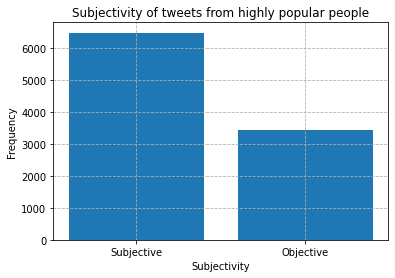

In [231]:
tweet_subjectivity_values = data_high_popularity["tweet_subjectivity"].value_counts().index
tweet_subjectivity_freq = data_high_popularity["tweet_subjectivity"].value_counts().values
plot_bar_chart(tweet_subjectivity_values, tweet_subjectivity_freq, 'Subjectivity', 'Frequency', 'Subjectivity of tweets from highly popular people')

### Sentiments of Tweets from people with followers between 1000 and 10,000<a class="anchor" id="medium_popular_sentiments"></a>

In [232]:
data_med_popularity = raw_data[raw_data["User_followers_count"] >= 1000]
data_med_popularity = data_med_popularity[data_med_popularity["User_followers_count"] < 10000]

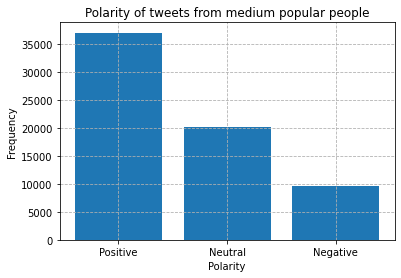

In [233]:
tweet_polarity_values = data_med_popularity["tweet_polarity"].value_counts().index
tweet_polarity_freq = data_med_popularity["tweet_polarity"].value_counts().values
plot_bar_chart(tweet_polarity_values, tweet_polarity_freq, 'Polarity', 'Frequency', 'Polarity of tweets from medium popular people')

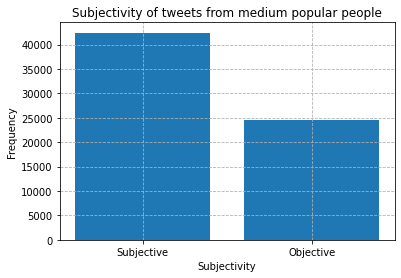

In [234]:
tweet_subjectivity_values = data_med_popularity["tweet_subjectivity"].value_counts().index
tweet_subjectivity_freq = data_med_popularity["tweet_subjectivity"].value_counts().values
plot_bar_chart(tweet_subjectivity_values, tweet_subjectivity_freq, 'Subjectivity', 'Frequency', 'Subjectivity of tweets from medium popular people')

### Sentiments of Tweets from people with less than 1000 followers<a class="anchor" id="low_popular_sentiments"></a>

In [235]:
data_low_popularity = raw_data[raw_data["User_followers_count"] < 1000]

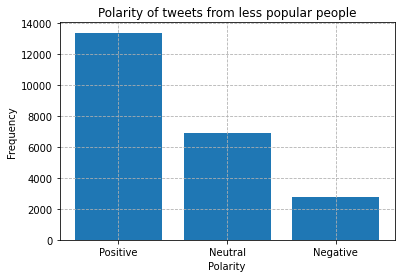

In [236]:
tweet_polarity_values = data_low_popularity["tweet_polarity"].value_counts().index
tweet_polarity_freq = data_low_popularity["tweet_polarity"].value_counts().values
plot_bar_chart(tweet_polarity_values, tweet_polarity_freq, 'Polarity', 'Frequency', 'Polarity of tweets from less popular people')

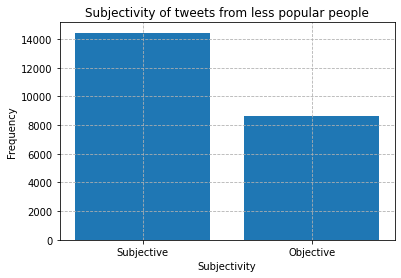

In [237]:
tweet_subjectivity_values = data_low_popularity["tweet_subjectivity"].value_counts().index
tweet_subjectivity_freq = data_low_popularity["tweet_subjectivity"].value_counts().values
plot_bar_chart(tweet_subjectivity_values, tweet_subjectivity_freq, 'Subjectivity', 'Frequency', 'Subjectivity of tweets from less popular people')

### Sentiments of tweets from user with most followers<a class="anchor" id="most_popular_user_sentiments"></a>

In [238]:
most_popular_user = raw_data["Name"][raw_data["User_followers_count"].idxmax()]
data_most_popular_user = raw_data[raw_data["Name"] == most_popular_user]

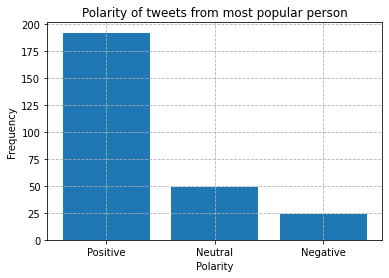

In [239]:
tweet_polarity_values = data_most_popular_user["tweet_polarity"].value_counts().index
tweet_polarity_freq = data_most_popular_user["tweet_polarity"].value_counts().values
plot_bar_chart(tweet_polarity_values, tweet_polarity_freq, 'Polarity', 'Frequency', 'Polarity of tweets from most popular person')

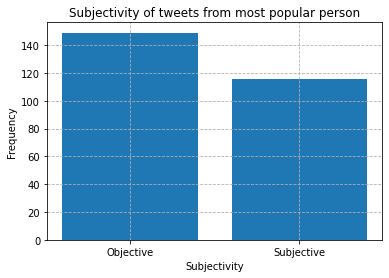

In [240]:
tweet_subjectivity_values = data_most_popular_user["tweet_subjectivity"].value_counts().index
tweet_subjectivity_freq = data_most_popular_user["tweet_subjectivity"].value_counts().values
plot_bar_chart(tweet_subjectivity_values, tweet_subjectivity_freq, 'Subjectivity', 'Frequency', 'Subjectivity of tweets from most popular person')

### Sentiments of Tweet with Most Retweets<a class="anchor" id="most_retweets_tweet_sentiments"></a>

In [253]:
most_retweet_tweets_idx = raw_data["Tweet_Retweet_count"].idxmax()
print(raw_data['tweet_polarity'][most_retweet_tweets_idx])
print(raw_data['tweet_subjectivity'][most_retweet_tweets_idx])

Neutral
Subjective


The polairty of the most retweeted tweet is neutral and conveys an opinion

### Sentiments of Favourite Tweet<a class="anchor" id="favourite_tweet_sentiments"></a>

In [252]:
favourite_tweet_idx = raw_data["Tweet_Favorite_count"].idxmax()
print(raw_data['tweet_polarity'][favourite_tweet_idx])
print(raw_data['tweet_subjectivity'][favourite_tweet_idx])
print(raw_data['Text'][favourite_tweet_idx])

Negative
Subjective
Our new @Harry_Styles Sleep Story is going live in a few hours.  A little background on how it came to be: #DreamWithHarry https://t.co/dG71AIzFhh


The most favourite tweet is classified with a negative polarity. However, after looking at the text of this tweet, this does not seem to be the case

## Conclusion<a class="anchor" id="conclusion"></a>

After analysing the sentiments behind the tweets, it can be concluded that:
- Overall, most of the tweets has a positive polarity and were more subjective. Which means that they conveyed an opinion rather than factual information
- When the users were grouped into categories according to the number of followers they had, the distribution of the sentiments of the tweets was similar to the sentiments of all tweets combined
- The user with most followers had a significantly higher number of tweets which converyed a positive sentiment. This could be one of the reasons why this person has so many followers
- The sentiments behind the most favourite tweet were classified as negative which does not seeem to be the case when looking at the text of the data. Hence this means that our classifier is not 100 percent accurate which is understandable
- Using a lexicon approach is a good start but it is not so accurate because the sentiments of words alone cannot clasify the sentiments of a sentence. For example, a lexicon based approach will be not able to detect sarcasm

## Future Work<a class="anchor" id="future_work"></a>

The Next Steps to improve this classifier will be to use a Machine Learning based approach, however, we need labelled tweets which tell us the sentiments of the tweets in order to train a classifier.

A good starting might be the following dataset which is publicly avavilable on kaggle containing 1.6 million tweets that have already been annotated:
https://www.kaggle.com/kazanova/sentiment140